In [32]:
import pandas as pd
import numpy as np

In [33]:
from google.colab import files
uploaded = files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset (1).csv


In [34]:
dataset = pd.read_csv('DigitalAd_dataset.csv')
dataset

,salary,Age,status
0,10000,16,0
1,10000,16,0
2,10000,16,0
3,10000,16,0
4,10000,16,0
...,...,...,...
9686,100000,70,1
9687,100000,70,1
9688,100000,70,1
9689,100000,70,1


In [35]:
print(dataset.head())

   salary  Age  status
0   10000   16       0
1   10000   16       0
2   10000   16       0
3   10000   16       0
4   10000   16       0


In [36]:
X = dataset.iloc[:, :-1].values
X

array([[ 10000,     16],
       [ 10000,     16],
       [ 10000,     16],
       ...,
       [100000,     70],
       [100000,     70],
       [100000,     70]])

In [37]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [41]:

y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 1]]


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[999 215]
 [995 214]]


In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 50.061906727197695%


No Skill: ROC AUC=50.000
Logistic Skill: ROC AUC=50.394


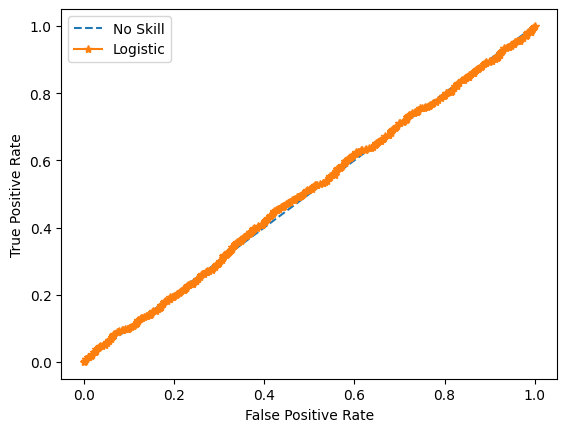

In [44]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lsProbability = lsProbability[:, 1]
# calculate scores
nsAUC = roc_auc_score(y_test, nsProbability)
lrAUC = roc_auc_score(y_test, lsProbability)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' % (lrAUC*100))
# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(y_test, lsProbability)
# plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
result = cross_val_score(model, X, Y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

CROSS VALIDATION SCORE: 0.45%


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression()
results_skfold = cross_val_score(model_skfold, X, Y, cv=skfold)
print("STRATIFIELD K-FOLD SCORE: %.2f%%" % (results_skfold.mean()*100.0))

STRATIFIELD K-FOLD SCORE: 50.46%


2423
1209


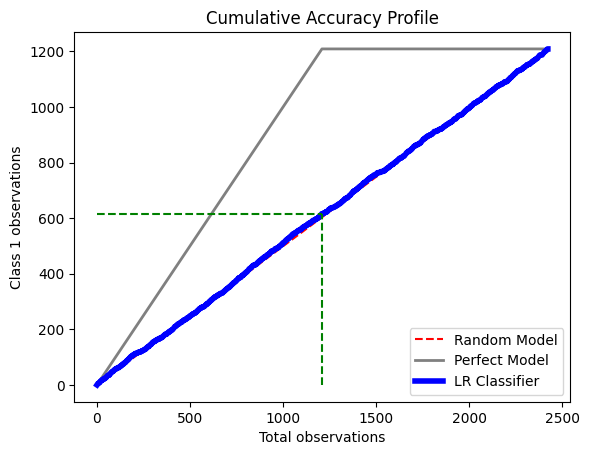

In [31]:

total = len(y_test)
print(total)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, class_1_count, total],
         [0, class_1_count, class_1_count],
         c = 'grey',
         linewidth = 2,
         label = 'Perfect Model')

probs = model.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values,
         y_values,
         c = 'b',
         label = 'LR Classifier',
         linewidth = 4)

index = int((50*total / 100))

## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')
